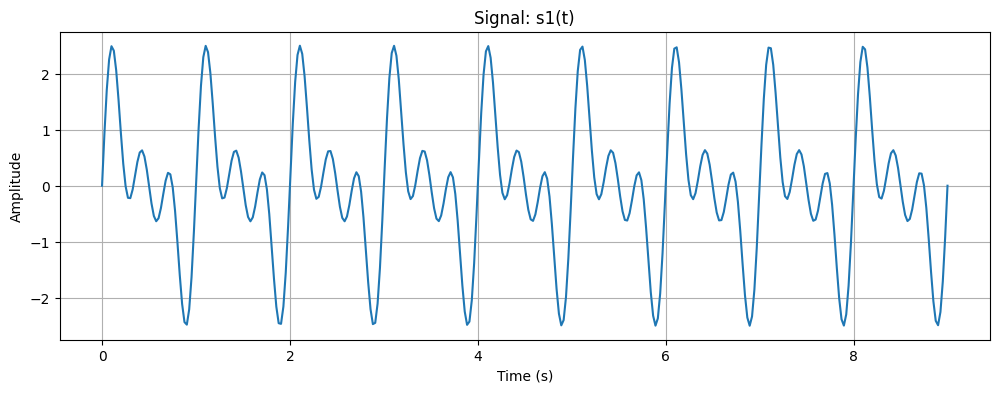

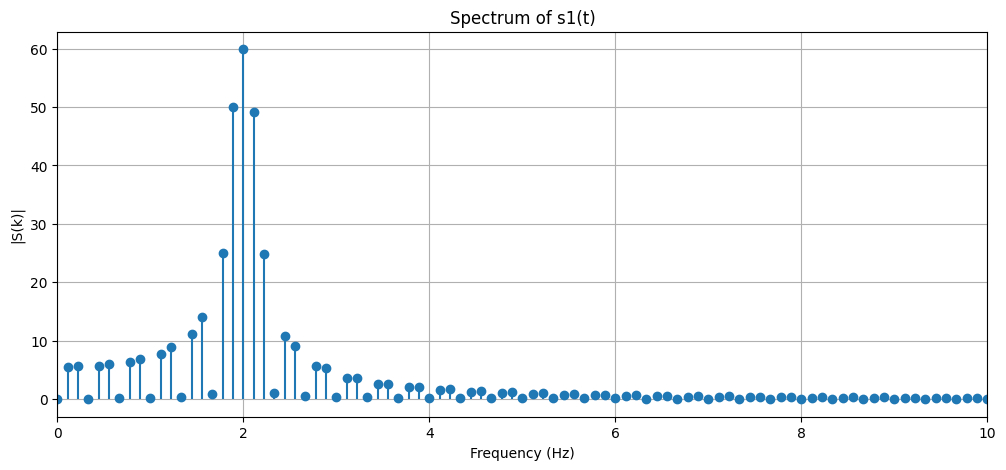

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import stft

t = np.linspace(0, 9, 360)

fs = 40  # Sampling frequency
N = len(t)  # Number of samples




s1 = np.sin(2* np.pi * t) + np.sin(4* np.pi * t) + np.sin(6* np.pi * t)

sa = np.where((t < 3) & (t >= 0) , 3 * np.sin(2 * np.pi * t), 0)

sb = np.where((t < 6) & (t >= 3) ,  np.sin(4 * np.pi * t), 0)

sc = np.where((t < 9) & (t >= 6) ,  np.sin(6 * np.pi * t), 0)

s2 = sa + sb + sc

X_real = np.fft.rfft(sb)
freqs_real = np.fft.rfftfreq(N, 1/fs)


plt.figure(figsize=(12, 4))
plt.plot(t, s1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal: s1(t)')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))
plt.stem(freqs_real, np.abs(X_real), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S(k)|')
plt.title('Spectrum of s1(t)')
plt.grid(True)
plt.xlim(0, 10)
plt.show()





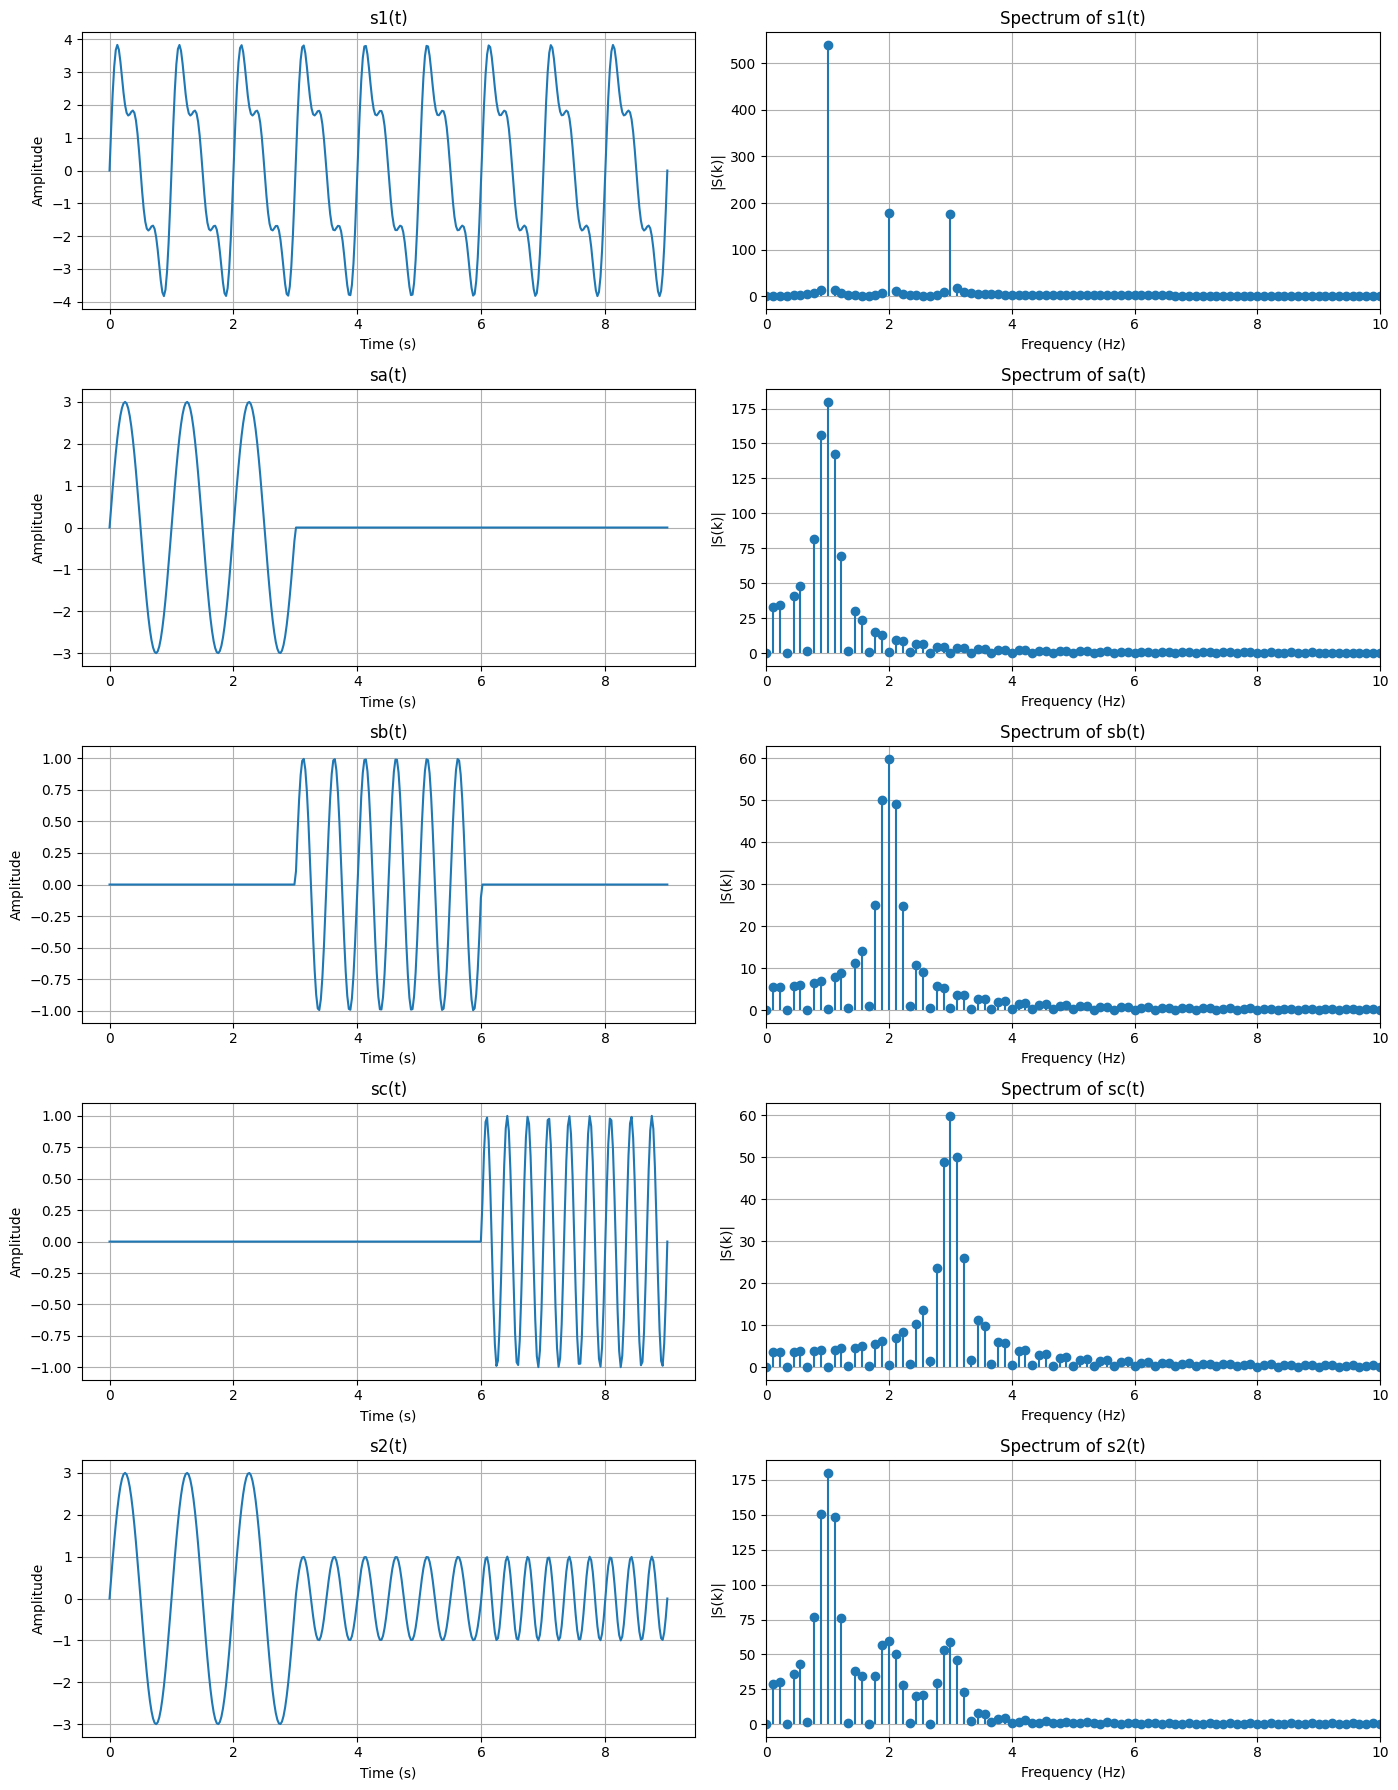

In [2]:


signals = {
    "s1": 3* np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + np.sin(6*np.pi*t),
    "sa": np.where((t >= 0) & (t < 3), 3*np.sin(2*np.pi*t), 0),
    "sb": np.where((t >= 3) & (t < 6), np.sin(4*np.pi*t), 0),
    "sc": np.where((t >= 6) & (t < 9), np.sin(6*np.pi*t), 0)
}
signals["s2"] = signals["sa"] + signals["sb"] + signals["sc"]


fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.flatten()


for i, (label, sig) in enumerate(signals.items()):

    axes[2*i].plot(t, sig)
    axes[2*i].set_title(f"{label}(t)")
    axes[2*i].set_xlabel("Time (s)")
    axes[2*i].set_ylabel("Amplitude")
    axes[2*i].grid(True)


    X = np.fft.rfft(sig)
    freqs = np.fft.rfftfreq(N, 1/fs)
    axes[2*i + 1].stem(freqs, np.abs(X), basefmt=" ")
    axes[2*i + 1].set_title(f"Spectrum of {label}(t)")
    axes[2*i + 1].set_xlim(0, 10)
    axes[2*i + 1].set_xlabel('Frequency (Hz)')
    axes[2*i + 1].set_ylabel('|S(k)|')
    axes[2*i + 1].grid(True)

plt.tight_layout()
plt.show()

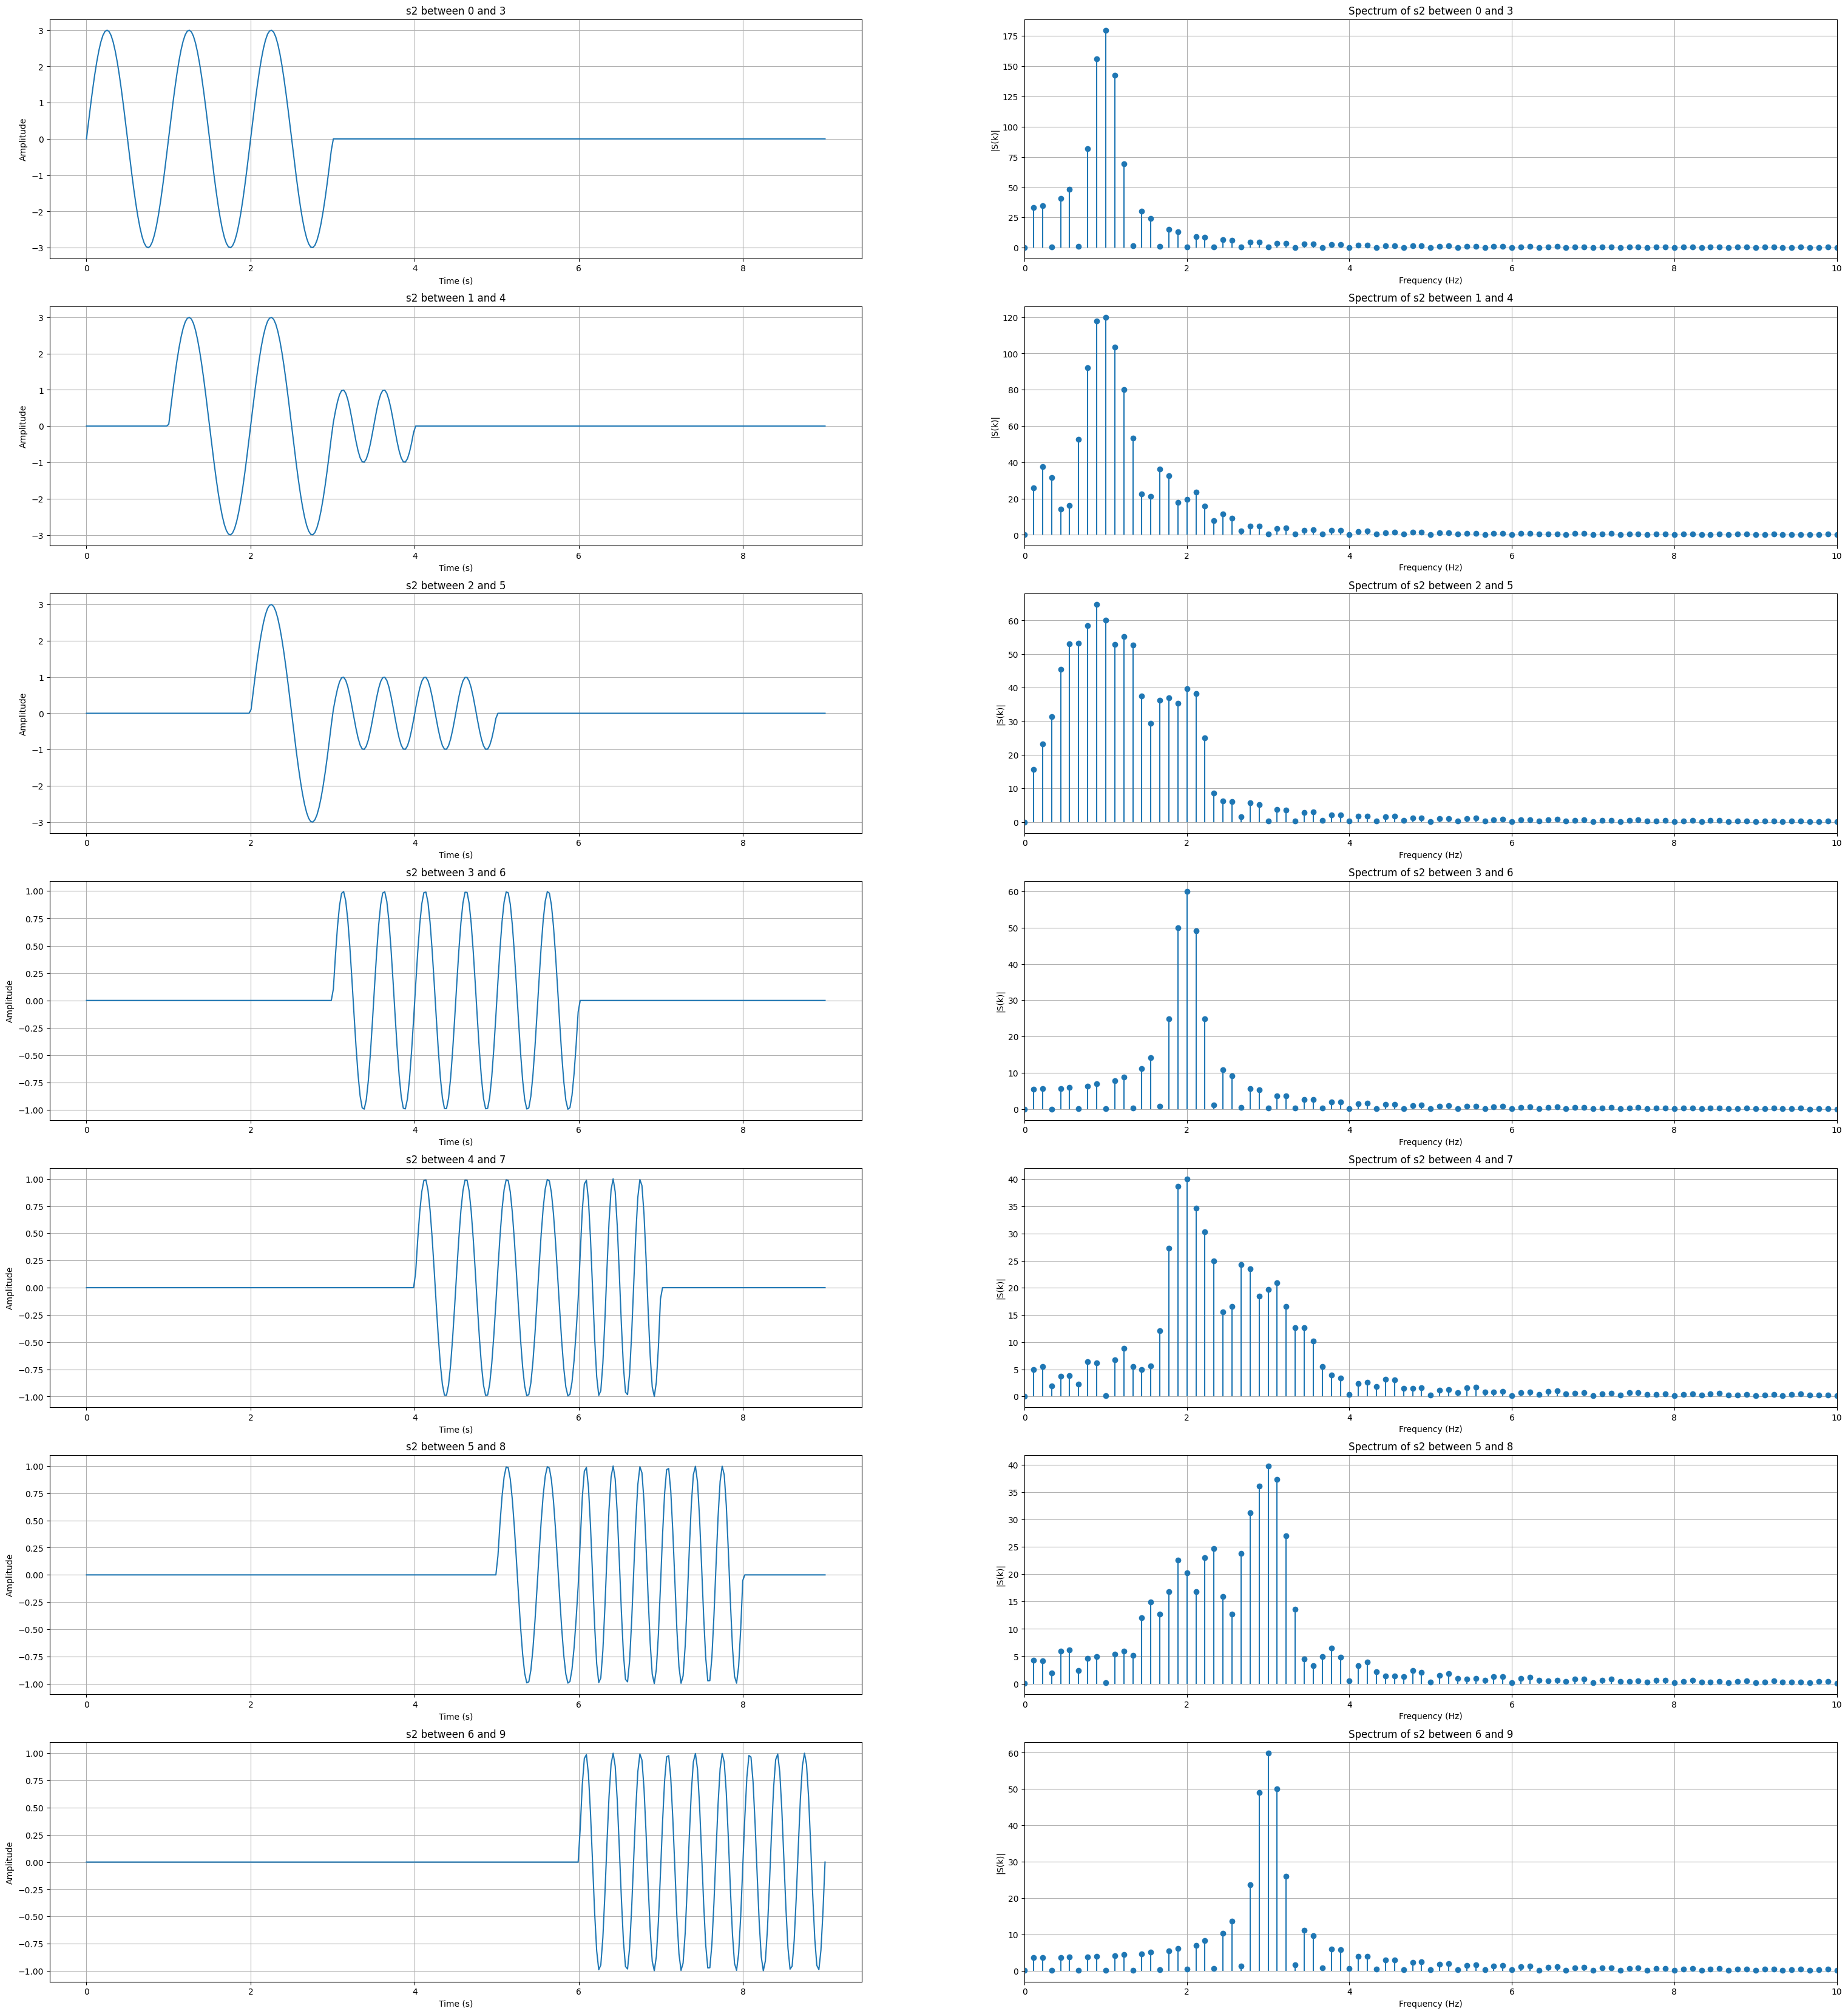

In [3]:
signals = {
    "s1": np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + np.sin(6*np.pi*t),
    "sa": np.where((t >= 0) & (t < 3), 3*np.sin(2*np.pi*t), 0),
    "sb": np.where((t >= 3) & (t < 6), np.sin(4*np.pi*t), 0),
    "sc": np.where((t >= 6) & (t < 9), np.sin(6*np.pi*t), 0)
}

s2 = signals["sa"] + signals["sb"] + signals["sc"]
fig, axs = plt.subplots(7, 2, figsize=(38, 42))

axs = axs.flatten()
for i in range(0, 7):
    f = np.where((t >= i) & (t < i+3),s2, 0)
    axs[2 * i].plot(t, f)
    axs[2*i].set_title(f"s2 between {i} and {i + 3}")
    axs[2*i].set_xlabel("Time (s)")
    axs[2*i].set_ylabel("Amplitude")
    axs[2*i].grid(True)

    X = np.fft.rfft(f)
    freqs = np.fft.rfftfreq(N, 1/fs)
    axs[2 * i + 1].stem(freqs, np.abs(X), basefmt=" ")
    axs[2 * i + 1].set_xlim(0, 10)
    axs[2*i + 1].set_title(f"Spectrum of s2 between {i} and {i + 3}")
    axs[2*i + 1].set_xlim(0, 10)
    axs[2*i + 1].set_xlabel('Frequency (Hz)')
    axs[2*i + 1].set_ylabel('|S(k)|')
    axs[2*i + 1].grid(True)










61 [ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667
  2.          2.33333333  2.66666667  3.          3.33333333  3.66666667
  4.          4.33333333  4.66666667  5.          5.33333333  5.66666667
  6.          6.33333333  6.66666667  7.          7.33333333  7.66666667
  8.          8.33333333  8.66666667  9.          9.33333333  9.66666667
 10.         10.33333333 10.66666667 11.         11.33333333 11.66666667
 12.         12.33333333 12.66666667 13.         13.33333333 13.66666667
 14.         14.33333333 14.66666667 15.         15.33333333 15.66666667
 16.         16.33333333 16.66666667 17.         17.33333333 17.66666667
 18.         18.33333333 18.66666667 19.         19.33333333 19.66666667
 20.        ] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [[3.16775893e-01 4.96381576e-02 3.85046509e-02 2.63084316e-01
  3.39571708e-02 5.36150601e-03 1.90320660e-02 4.77998665e-03
  9.14289426e-03 3.46035010e-02]
 [4.42462960e-01 5.00110598e-02 3.88874528e-02 3.88756429e-01
  

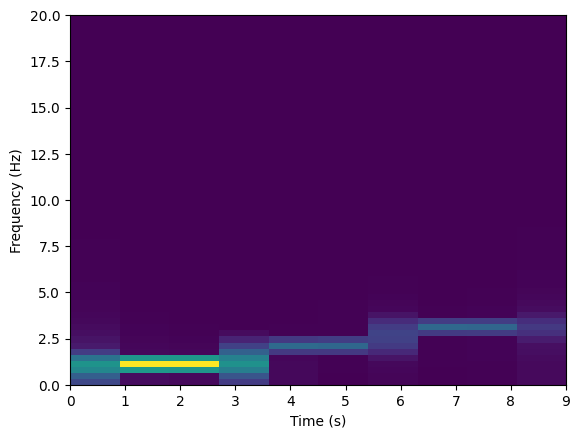

In [4]:
from scipy.signal import stft
import numpy as np

freqArray, timeArray, s2Stft = stft(s2,fs= 40, nperseg=120, noverlap=80, window="hann", padded = False)

print(len(np.abs(s2Stft)), freqArray, timeArray, np.abs(s2Stft))


plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.imshow(np.abs(s2Stft), origin='lower', aspect='auto', extent=[timeArray[0], timeArray[-1], freqArray[0], freqArray[-1]])

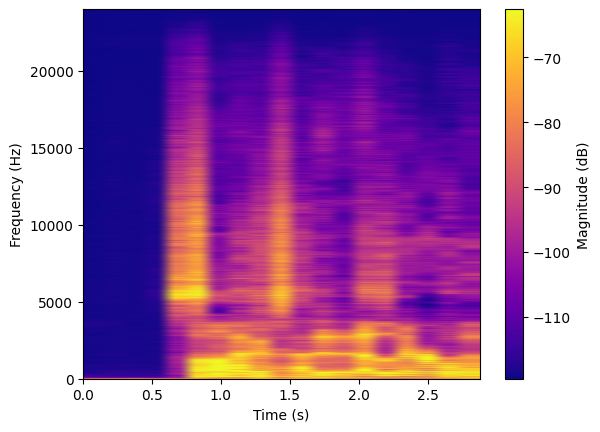

In [8]:
import soundfile as sf
from matplotlib import pyplot as plt
import numpy as np

data, samplerate = sf.read('../data/00252_4.9dB_PCM16.wav')
segmentLength = int(samplerate / 100 * 32)
overlap = int(segmentLength / 2)
dataFreqArray, dataTimeArray, dataStft = stft(data,fs= samplerate, nperseg=segmentLength, noverlap=overlap, window="hann")
timeMask = dataTimeArray <= 3


magnitude = np.abs(dataStft[:, timeMask])
magnitude_db = 20 * np.log10(magnitude + 1e-6)


vmin = np.percentile(magnitude_db, 5)
vmax = np.percentile(magnitude_db, 99)
magnitude_db_clipped = np.clip(magnitude_db, vmin, vmax)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")


plt.imshow(magnitude_db_clipped,
           origin='lower',
           aspect='auto',
           extent=[dataTimeArray[timeMask][0], dataTimeArray[timeMask][-1], dataFreqArray[0], dataFreqArray[-1]],
           cmap='plasma')
cbar = plt.colorbar()
cbar.set_label("Magnitude (dB)")

